# Model: K Nearest Neighbors

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Importing the model
from sklearn.neighbors import KNeighborsClassifier

### Loading in Data

In [2]:
df = pd.read_excel('../top10_corr_features.xlsx')
df = df.drop(df.columns[0], axis = 1)

### Scaling the Data

In [3]:
scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Helper Functions

#### Function for plotting confusion matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling
The preferred evaluation metric used will be __Precision__ for each class.  They will be optimized using the __F1 Score-Macro-Average__ to balance the Precision and Recall.  This is done because we want to not only be correct when predicting but also make a decent amount of predictions for each class.  Classes such as 'Buy' and 'Sell' are more important than 'Hold'.

### Fitting and Training

In [6]:
# Fitting and training
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Printing out Evaluation Metrics

In [7]:
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.36      0.67      0.47         6
         Buy       0.60      0.33      0.43         9
        Hold       0.00      0.00      0.00         2

    accuracy                           0.41        17
   macro avg       0.32      0.33      0.30        17
weighted avg       0.45      0.41      0.39        17



### Confusion Matrix

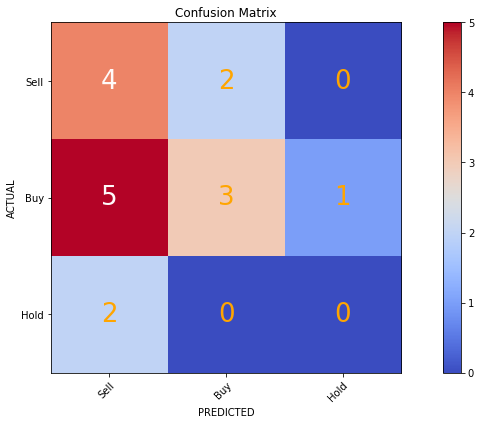

In [8]:
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

## Tuning Model Parameters

In [9]:
from sklearn.model_selection import GridSearchCV

### Parameters

In [14]:
# Parameters to Tune
params = {"n_neighbors": [10, 15, 20],
          "weights": ['uniform', 'distance'],
          "p": [1,2]}

In [15]:
search = GridSearchCV(clf, params, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')

search.fit(X,y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] n_neighbors=10, p=1, weights=uniform ............................
[CV]  n_neighbors=10, p=1, weights=uniform, score=(train=0.365, test=0.286), total=   0.0s
[CV] n_neighbors=10, p=1, weights=uniform ............................
[CV]  n_neighbors=10, p=1, weights=uniform, score=(train=0.378, test=0.292), total=   0.0s
[CV] n_neighbors=10, p=1, weights=uniform ............................
[CV]  n_neighbors=10, p=1, weights=uniform, score=(train=0.415, test=0.387), total=   0.0s
[CV] n_neighbors=10, p=1, weights=distance ...........................
[CV]  n_neighbors=10, p=1, weights=distance, score=(train=1.000, test=0.243), total=   0.0s
[CV] n_neighbors=10, p=1, weights=distance ...........................
[CV]  n_neighbors=10, p=1, weights=distance, score=(train=1.000, test=0.239), total=   0.0s
[CV] n_neighbors=10, p=1, weights=distance ...........................
[CV]  n_neighbors=10, p=1, weights=distance, score=(trai

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-pack

[CV]  n_neighbors=10, p=2, weights=distance, score=(train=1.000, test=0.348), total=   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................
[CV]  n_neighbors=15, p=1, weights=uniform, score=(train=0.278, test=0.233), total=   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................
[CV]  n_neighbors=15, p=1, weights=uniform, score=(train=0.274, test=0.195), total=   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................
[CV]  n_neighbors=15, p=1, weights=uniform, score=(train=0.394, test=0.369), total=   0.0s
[CV] n_neighbors=15, p=1, weights=distance ...........................
[CV]  n_neighbors=15, p=1, weights=distance, score=(train=1.000, test=0.254), total=   0.0s
[CV] n_neighbors=15, p=1, weights=distance ...........................
[CV]  n_neighbors=15, p=1, weights=distance, score=(train=1.000, test=0.256), total=   0.0s
[CV] n_neighbors=15, p=1, weights=distance ...........................
[CV]  n_neighbors=15, p=1

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  n_neighbors=20, p=1, weights=uniform, score=(train=0.278, test=0.208), total=   0.0s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=(train=0.384, test=0.268), total=   0.0s
[CV] n_neighbors=20, p=1, weights=uniform ............................
[CV]  n_neighbors=20, p=1, weights=uniform, score=(train=0.325, test=0.251), total=   0.0s
[CV] n_neighbors=20, p=1, weights=distance ...........................
[CV]  n_neighbors=20, p=1, weights=distance, score=(train=1.000, test=0.208), total=   0.0s
[CV] n_neighbors=20, p=1, weights=distance ...........................
[CV]  n_neighbors=20, p=1, weights=distance, score=(train=1.000, test=0.243), total=   0.0s
[CV] n_neighbors=20, p=1, weights=distance ...........................
[CV]  n_neighbors=20, p=1, weights=distance, score=(train=1.000, test=0.359), total=   0.0s
[CV] n_neighbors=20, p=2, weights=uniform ............................
[CV]  n_neighbors=20, p=2

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [10, 15, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_macro', verbose=5)

### Tuned Results

In [16]:
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score:", search.score(X, y))
print("\nBest Parameter Found:")
search.best_params_

Mean Training Score: 0.6744194795654823
Mean Testing Score: 1.0

Best Parameter Found:


{'n_neighbors': 20, 'p': 2, 'weights': 'distance'}

### Model with the Best Parameters

In [17]:
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

#### Results from Optimum Parameters

In [18]:
# Classifier predictions
s_pred = search_clf.predict(X_test)

#Printing out results
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.29      0.33      0.31         6
         Buy       0.40      0.44      0.42         9
        Hold       0.00      0.00      0.00         2

    accuracy                           0.35        17
   macro avg       0.23      0.26      0.24        17
weighted avg       0.31      0.35      0.33        17



C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion Matrix for Optimum Parameters

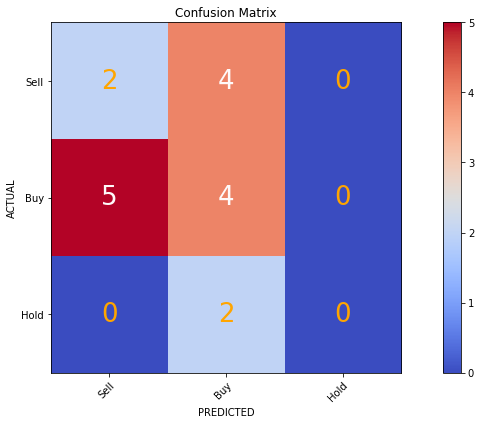

In [19]:
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()